### 1. Latar Belakang

### 2. Problem Statement

### 3. Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Uji Statistic

import warnings
warnings.filterwarnings('ignore')

Dataset ini berisi informasi terkait data pelanggan, produk yang dijual, promo yang dijalankan, tempat pembelian. ada 29 column yang tersedia di dalam data set Supermarket Customer, yaitu:

**Data Pelanggan**
- ID : Unik ID untuk setiap pelanggan
- Year_Birth : Tahun lahir pelanggan
- Education : Pendidikan pelanggan
- Marital_Status : Status pernikahan pelanggan 
- Income : pendapatan pelanggan
- Kidhome : anak kecil yang dimiliki pelanggan
- Teenhome : anak dalam status remaja yang dimiliki pelanggan
- Dt_Customer : waktu pendaftaran pelanggan
- Recency : angka hari terakhir pelanggan membeli
- Complain : pernah atau tidaknya pelanggan komplen dalam kurun waktu 2 tahun

**Data Produk**
- MntWines : Jumlah yang dihabiskan untuk wine dalam 2 tahun terakhir
- MntFruits : Jumlah yang dihabiskan untuk buah dalam 2 tahun terakhir
- MntMeatProducts : Jumlah yang dihabiskan untuk daging dalam 2 tahun terakhir
- MntFishProducts : Jumlah yang dihabiskan untuk ikan dalam 2 tahun terakhir
- MntSweet Products : Jumlah yang dihabiskan untuk gula dalam 2 tahun terakhir
- MntGoldProds : Jumlah yang dihabiskan untuk emas dalam 2 tahun terakhir

**Data Promosi**
- NumDealsPurchases : Jumlah pembelian yang dilakukan dengan diskon
- AcceptedCmp1 : 1 jika pelanggan menerima penawaran pada kampanye pertama, 0 jika tidak
- AcceptedCmp2 : 1 jika pelanggan menerima penawaran pada kampanye pertama, 0 jika tidak
- AcceptedCmp3 : 1 jika pelanggan menerima penawaran pada kampanye pertama, 0 jika tidak
- AcceptedCmp4 : 1 jika pelanggan menerima penawaran pada kampanye pertama, 0 jika tidak
- AcceptedCmp5 : 1 jika pelanggan menerima penawaran pada kampanye pertama, 0 jika tidak
- Response : 1 if the customer accepted the offer in the last campaign, 0 otherwise 

**Place**
- NumWebPurchases : Jumlah angka pembelian melalui website
- NumCatalogPurchases : Jumlah angka pembelian melalui catalog
- NumStorePurchases : Jumlah angka pembelian melalui Store
- NumWebVisitsMonth : Jumlah angka kunjungan melalui website


Berikut 5 baris teratas dan terbawah dari dataset Supermarket Customer.

In [8]:
df = pd.read_csv('./Supermarket Customers.csv', sep='\t')
display(df.head(),df.tail())


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


### Data Understanding and Cleaning

Sebelum masuk ke dalam analisis, di bagian ini akan ditampilkan penjelasan awal mengenai data yang kita gunakan. Pada bagian ini juga akan dilakukan cleaning data untuk membersihkan hal-hal yang tidak wajar di dalam dataset serta mengkondisikan data agar dapat dianalisis secara tepat sesuai dengan pemasalah yang ingin dijawab.

**1. Load DataSet dan Penyesuaian Data Types**

**Data Understanding**

In [12]:
# Informasi mengenai jumlah baris dan kolom dataset serta nama dan datatype tiap kolom
print(f'Dataset Supermarket Customers.csv memiliki {df.shape[0]} Baris dan {df.shape[1]} kolom')
df.info()

Dataset Supermarket Customers.csv memiliki 2240 Baris dan 29 kolom
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         

Selanjutnya kita ingin melihat gambaran data dari dataset crime dengan menggunakan statistik Deskriptif

#### Statistic Deskriptif

In [13]:
# Statistik deskriptif dari kolom numerikal
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


kenapa make deskriptif karena dari total kolom isinya kebanyak numerikal dan yang kategorikal cuman ada di 2 kolom

In [14]:
# Menampilkan statistik deskriptif dari kolom kategorikal
df.describe(include=['O'])

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


**Missing values**

In [11]:
# Menampilkan jumlah baris yang memiliki nilai kosong dari setiap kolom
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [15]:
# Persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

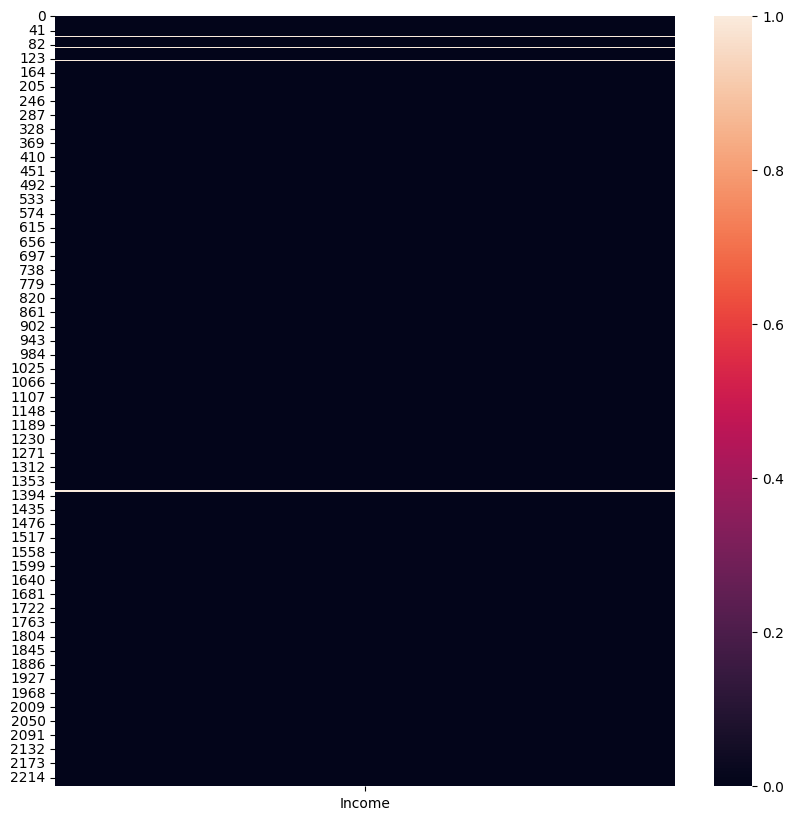

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['Income']].isna())
plt.show()

**Outlier**

**Data Duplikat**

In [23]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


tidak ada data duplikat di setiap kolom